**Question 1**：在实验中，哪个是因变量，哪个是自变量。

**Answer**：自变量是颜色与单词意义是否相符，因变量是**被试样本**回答的反应时间。

**Question 2a**：建立假设

**My Assumptions**:当文字颜色与文字意义相符的时候，反因时间更短。

**设立数学字符**：

* $Q_1$表示第一四分位差
* $Q_2$表示中位数
* $Q_3$表示第三个四分位差
* $Z_0$为样本值
* $Z$为统计量
* $P_{Congrent}$为文字颜色与意义相符的反应时间比不相符反应时间短的概率。
* $P_{Incongruent}$为文字颜色与意义相符的反应时间比不相符反应时间长的概率。

$$并有：P_{Congrent}+P_{Incongruent}=1$$

* $\alpha$=0.1
* $H_0：\bar x_c\geq\bar x_i$:在没有经过特殊训练的人群中，大多数人在进行Stroop Effect的实验的时候，当文字颜色与文字意义相符的时候，反应时间比文字颜色与文字意义不相符的时候的反应时间更长或与之相等。
* $H_1：\bar x_c<\bar x_i$：在没有经过特殊训练的人群中，大多数人在进行Stroop Effect的实验的时候，当文字颜色与文字意义相符的时候，反应时间比文字颜色与文字意义不相符的时候的反应时间更短。

* $\bar x_c$:文字意义与文字颜色相符的反应时间的平均数
* $\bar x_i$:文字意义与文字颜色不相符的反应时间的平均数
* $\sigma_c$:文字意义与文字颜色相符的反应时间的方差
* $\sigma_i$:文字意义与文字颜色不相符的反应时间的方差

**Question 2b**：通过统计检验来辩证提出的假设，并针对统计检验的假设前提进行说明

**选择相依样本的学生t检验**

* 为什么使用学生t检验？

学生t检验的适用范围是已知一个总体均数，并且样本均数与样本标准差是可以得到的。而Z检验是一般用于大样本(即样本容量大于30)平均值差异性检验的方法。它是用标准正态分布的理论来推断差异发生的概率，从而比较两个平均数的差异是否显著。因此学生t检验较Z检验，样本容量要求更低。在给出的`stroopdata.csv`中，样本数量不足30个。我们需要在样本容量不足30个的前提下，证明文字颜色与文字意义相符的时候，反因时间更短。故本次采用采用学生t检验。

* 为什么是相依样本？

在Stroop Effect的实验中，在实验进行时可以被理解为一种训练，这种训练导致了接受文字颜色与意义不相符的反应时间可能减少，因此为相依样本。

* 单尾检验还是双尾检验？

由于假设为$H_0：\bar x_c\geq\bar x_i$，使用左单尾检验。

**Question3**:为数据集组计算了描述性统计分析，包括至少一项中心性测量和一项可变性测量。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data=pd.read_csv("stroopdata.csv")

**给出中心性测量数据**

In [2]:
print "所以，文字意义与文字颜色相符的反应时间的平均数为："+bytes(np.mean(data['Congruent']))
print "文字意义与文字颜色不相符的反应时间的平均数为："+bytes(np.mean(data['Incongruent']))

所以，文字意义与文字颜色相符的反应时间的平均数为：14.051125
文字意义与文字颜色不相符的反应时间的平均数为：22.0159166667


In [3]:
print "所以，文字意义与文字颜色相符的反应时间的中位数为："+bytes(np.median(data['Congruent']))
print "文字意义与文字颜色不相符的反应时间的中位数为："+bytes(np.median(data['Incongruent']))

所以，文字意义与文字颜色相符的反应时间的中位数为：14.3565
文字意义与文字颜色不相符的反应时间的中位数为：21.0175


**给出可变性测量**

In [4]:
print "给出文字意义与文字颜色相符的反应时间的方差："+bytes(np.var(data['Congruent']))
print "给出文字意义与文字颜色不相符的反应时间的方差："+bytes(np.var(data['Incongruent']))

给出文字意义与文字颜色相符的反应时间的方差：12.1411528594
给出文字意义与文字颜色不相符的反应时间的方差：22.0529338264


**Question4:**创建了展示数据的一项或两项可视化，包括用注释说明图中可观察到的信息。

导入包数据，并作箱线图：

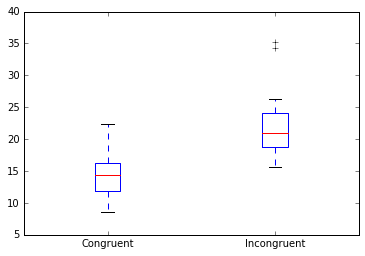

In [5]:
plt.boxplot((data['Congruent'],data['Incongruent' ]),labels=('Congruent','Incongruent'))
plt.show()

由箱线图展现的数据可视化得，文字意义与颜色不相同的时候的反应时间比文字意义与颜色相同的时候的**试验样本平均反应时间**更长。

**Question5:**正确执行并报告了一项统计检验，包括检验统计量、P 值和检验结果。检验结果针对执行的试验任务进行了解释。

**进行student t-test**

引入scipy包，进行t-test数据整理，得到t值和p值。

In [6]:
from scipy.stats import ttest_rel
from scipy import stats
t,p=ttest_rel(data['Congruent'],data['Incongruent' ])
print "t值为："+ bytes(t)
print "p值为："+bytes(p)

t值为：-8.02070694411
p值为：4.10300058571e-08


因此因为$p=4.10300058571e-08<\alpha$

拒绝零假设成功。

**Question 6：进一步的研究**

* 涉及到语意干涉的情况，即单词意义与颜色差异的初始中性刺激，当单词颜色与单词意义彼此不干扰时比在不一致的条件下更快。墨水的颜色与词的含义被理解成为干扰的源头，导致认知速度的下降。

就以上分析提出下列假设：

单词意义与单词颜色的相差度也可能作为可量化的干扰，并且随着差异性的增大，干扰效果增大，具体解释为认知速度的变化。

>如，红色意义的单词（Red），用深红、浅红、洋红等与红色颜色相近的颜色来着色的反应时间与用其余与红色相差甚远的颜色来着色的反应时间应有所差异，具体差异表现为其反应时间更比前者更长。

在此处，用RGB等颜色选取表的方式，对颜色进行定量分析。

在此展示本人的实验思路：

设定差异值为$D_i$

1. 将单词颜色与与之对应的标准颜色标记为$D_i$=0，在RGB颜色模型中，每提高一个单位（约10左右），标记为$D_i$=1。
2. 将实验设定为双盲实验以减小实验误差，工作人员不知道其标记单位，实验者对情况一无所知。
3. 通过打乱标记上各种颜色，进行记录实验数据。
4. 将答案中每个颜色的受试情况抽出，以差异值$D_i$作为x轴，反应时间t为y轴。做频率分布图。

设定α=0.1

$H_0$:大多数情况下，颜色差异越大，反应时间越短。

$H_1$:大多数情况下，颜色差异越大，反应时间越长。

当超过90%的实验数据显示，$D_i$与t成正相关，即颜色差异越大，反应时间越长，即拒绝零假设成功。

* 大脑的识别词的颜色的能力有一个滞后，因为大脑读取词比识别颜色更快。

可能是基于文字处理明显快于颜色处理。

在有关字和颜色的冲突的情况下，如果任务是报告颜色，则字信息在呈现处理混淆的颜色信息之前到达决策阶段。相反，如果任务是报告单词，由于颜色信息滞后于单词信息，则可以在冲突信息之前作出决定。

由于识别颜色不是一个“自动过程”，有回应的犹豫;而大脑通过习惯阅读的结果自动理解词的意义。这个想法是基于这样的前提：自动阅读不需要受到控制的注意，但是仍然使用足够的注意资源以减少可用于颜色信息处理的注意力的量。

参考信息：

* [Stroop Effect Wikipedia](https://en.wikipedia.org/wiki/Stroop_effect)
* [Matplotlib Example](http://matplotlib.org/examples/)
* [To fetch the row of the csv](http://www.lfhacks.com/tech/python-read-specific-column-csv)
* [Statistical hypothesis testing-Wikipedia](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing#Variations_and_sub-classes)